In [1]:
import os
from sklearn.utils import shuffle
import sklearn.metrics as mt
from sklearn.model_selection import train_test_split 
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/10)
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
    return a2

def make_square(img):
    cols,rows = img.size
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols - rows)/2
        img = img.crop((0,pad,rows,rows))
    return img

In [3]:
import os

import imageio
import skimage
import skimage.io
import skimage.transform

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image,ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display,HTML

In [4]:
fp = '/home/aryan/Documents/F'
x,y = [],[]
loaded_images = []
images = os.listdir('/home/aryan/Documents/F')
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    #response = requests.get(url)
    url = fp+'/'+str(url)
    img = Image.open(url)
    img.load()
    img = make_square(img)
    img = img.resize((128,128),Image.ANTIALIAS)
    
    loaded_images.append(img)
    for i in range(10):
        # For adding noise in the images
        img_array = np.asarray(img)
        img_array_noise = add_noise(img_array)
        
        
        # For Input Images
        img_array = img_array.flatten()
        img_array = img_array.astype(np.float32)
        img_array = (img_array - 128)/128
        
        # For Output Images
        img_array_noise = img_array_noise.flatten()
        img_array_noise = img_array_noise.astype(np.float32)
        img_array_noise = (img_array_noise-128)/128
        
        x.append(img_array_noise)
        y.append(img_array)
        
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(220, 49152)
(220, 49152)


In [5]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [6]:
print('Creating/Training Neural Networks... ')
model = Sequential()
model.add(Dense(100,input_dim=x.shape[1],activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(x.shape[1]))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x,y,verbose=0,epochs=250)

print('Neural Network Trained')

Creating/Training Neural Networks... 
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Neural Network Trained


*** Trail 1 ***
With Noise


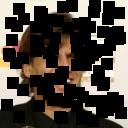

After Auto Encoder Noise Removal


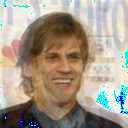



*** Trail 2 ***
With Noise


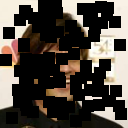

After Auto Encoder Noise Removal


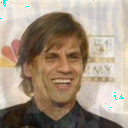



*** Trail 3 ***
With Noise


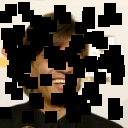

After Auto Encoder Noise Removal


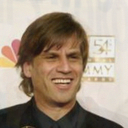



*** Trail 4 ***
With Noise


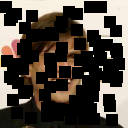

After Auto Encoder Noise Removal


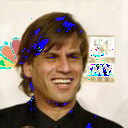



*** Trail 5 ***
With Noise


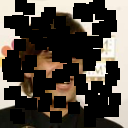

After Auto Encoder Noise Removal


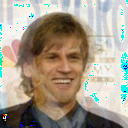



*** Trail 6 ***
With Noise


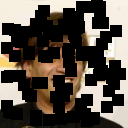

After Auto Encoder Noise Removal


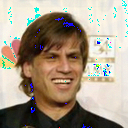



*** Trail 7 ***
With Noise


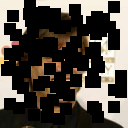

After Auto Encoder Noise Removal


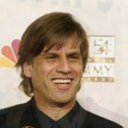



*** Trail 8 ***
With Noise


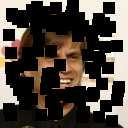

After Auto Encoder Noise Removal


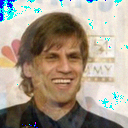



*** Trail 9 ***
With Noise


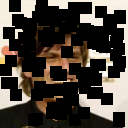

After Auto Encoder Noise Removal


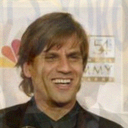



*** Trail 10 ***
With Noise


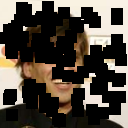

After Auto Encoder Noise Removal


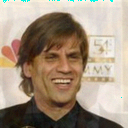



*** Trail 11 ***
With Noise


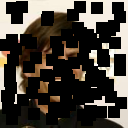

After Auto Encoder Noise Removal


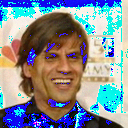



*** Trail 12 ***
With Noise


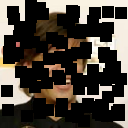

After Auto Encoder Noise Removal


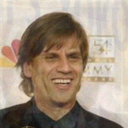



*** Trail 13 ***
With Noise


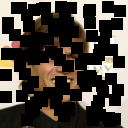

After Auto Encoder Noise Removal


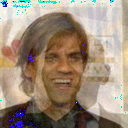



*** Trail 14 ***
With Noise


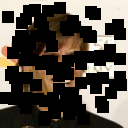

After Auto Encoder Noise Removal


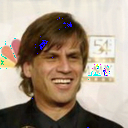



*** Trail 15 ***
With Noise


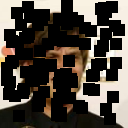

After Auto Encoder Noise Removal


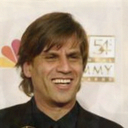



*** Trail 16 ***
With Noise


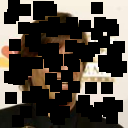

After Auto Encoder Noise Removal


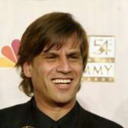



*** Trail 17 ***
With Noise


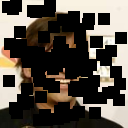

After Auto Encoder Noise Removal


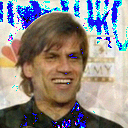



*** Trail 18 ***
With Noise


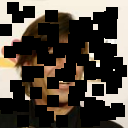

After Auto Encoder Noise Removal


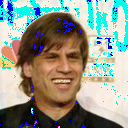



*** Trail 19 ***
With Noise


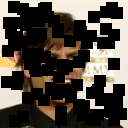

After Auto Encoder Noise Removal


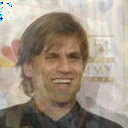



*** Trail 20 ***
With Noise


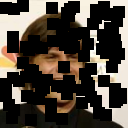

After Auto Encoder Noise Removal


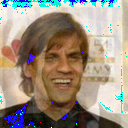

In [7]:
for z in range(20):
    print(f'*** Trail {z+1} ***')
    
    i = np.random.randint(len(loaded_images))
    img = loaded_images[0]
    img_array = np.asarray(img)
    cols,rows = img.size
    
    img_array_noise = add_noise(img_array)
    
    img2 = img_array_noise.astype(np.uint8)
    img2 = Image.fromarray(img2,'RGB')
    print('With Noise')
    display(img2)
    
    # Giving Noisy image to Autoencoder
    img_array_noise = img_array_noise.flatten()
    img_array_noise = img_array_noise.astype(np.float32)
    img_array_noise = (img_array_noise-128)/128
    img_array_noise = np.array([img_array_noise])
    pred = model.predict(img_array_noise)[0]
    
    # Displaying Neural Result
    img_array2 = pred.reshape(rows,cols,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2,'RGB')
    print('After Auto Encoder Noise Removal')
    display(img2)
    print('\n')